In [ ]:
!pip install -q pyspark

In [ ]:
# Import pacakges

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Initiate Spark Session
conf = SparkConf().setAppName("PredictiBetes")
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession.builder.getOrCreate()

sqlContext = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

**Read File**

In [ ]:
diabetes_dataset = spark.read.csv('/content/diabetes.csv',sep=',', inferSchema=True, header=True)

In [ ]:
diabetes_dataset.head(10)

[Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1),
 Row(Pregnancies=1, Glucose=85, BloodPressure=66, SkinThickness=29, Insulin=0, BMI=26.6, DiabetesPedigreeFunction=0.351, Age=31, Outcome=0),
 Row(Pregnancies=8, Glucose=183, BloodPressure=64, SkinThickness=0, Insulin=0, BMI=23.3, DiabetesPedigreeFunction=0.672, Age=32, Outcome=1),
 Row(Pregnancies=1, Glucose=89, BloodPressure=66, SkinThickness=23, Insulin=94, BMI=28.1, DiabetesPedigreeFunction=0.167, Age=21, Outcome=0),
 Row(Pregnancies=0, Glucose=137, BloodPressure=40, SkinThickness=35, Insulin=168, BMI=43.1, DiabetesPedigreeFunction=2.288, Age=33, Outcome=1),
 Row(Pregnancies=5, Glucose=116, BloodPressure=74, SkinThickness=0, Insulin=0, BMI=25.6, DiabetesPedigreeFunction=0.201, Age=30, Outcome=0),
 Row(Pregnancies=3, Glucose=78, BloodPressure=50, SkinThickness=32, Insulin=88, BMI=31.0, DiabetesPedigreeFunction=0.248, Age=26, Outcome=1),
 Row(Pr

In [ ]:
diabetes_dataset.show(10)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [ ]:
diabetes_dataset.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [ ]:
diabetes_dataset.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [ ]:
print(type(diabetes_dataset))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
diabetes_dataset.groupBy('outcome').count().show()

+-------+-----+
|outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [ ]:
pd.DataFrame(diabetes_dataset.dtypes, columns = ['Column Name','Data type'])

,Column Name,Data type
0,Pregnancies,int
1,Glucose,int
2,BloodPressure,int
3,SkinThickness,int
4,Insulin,int
5,BMI,double
6,DiabetesPedigreeFunction,double
7,Age,int
8,Outcome,int


In [ ]:
# Convert df to Pandas
diabetes_data = diabetes_dataset.toPandas()

In [ ]:
#Desribing the dataset after converting it to pandas dataframe
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


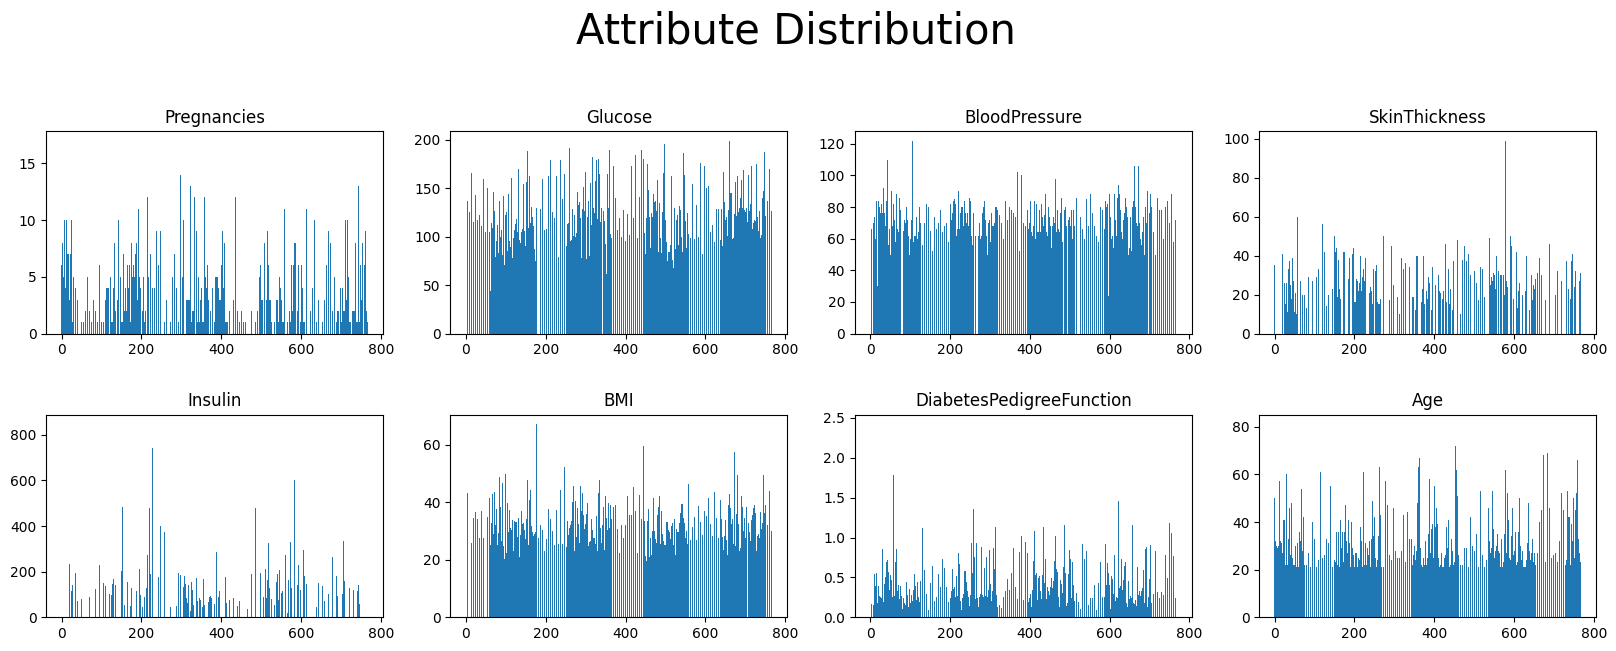

In [ ]:
# Plot each column using bar plot
fig = plt.figure(figsize=(20,10))
title = fig.suptitle("Attribute Distribution", fontsize=30, verticalalignment="center")
for col, num in zip(diabetes_data.describe().columns, range(1,9)):
  axis = fig.add_subplot(3,4, num)
  axis.bar(diabetes_data.index, diabetes_data[col]) #color="blue", alpha=0.35) #edgecolors="skyblue")
  plt.title(col, fontsize=12)

fig.subplots_adjust(hspace=0.4)

###Rectifying Null Values

In [ ]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#####Based on the above output, we can say that, in the dataset, we are reffering to, there are no null values.

###Outlier Detection

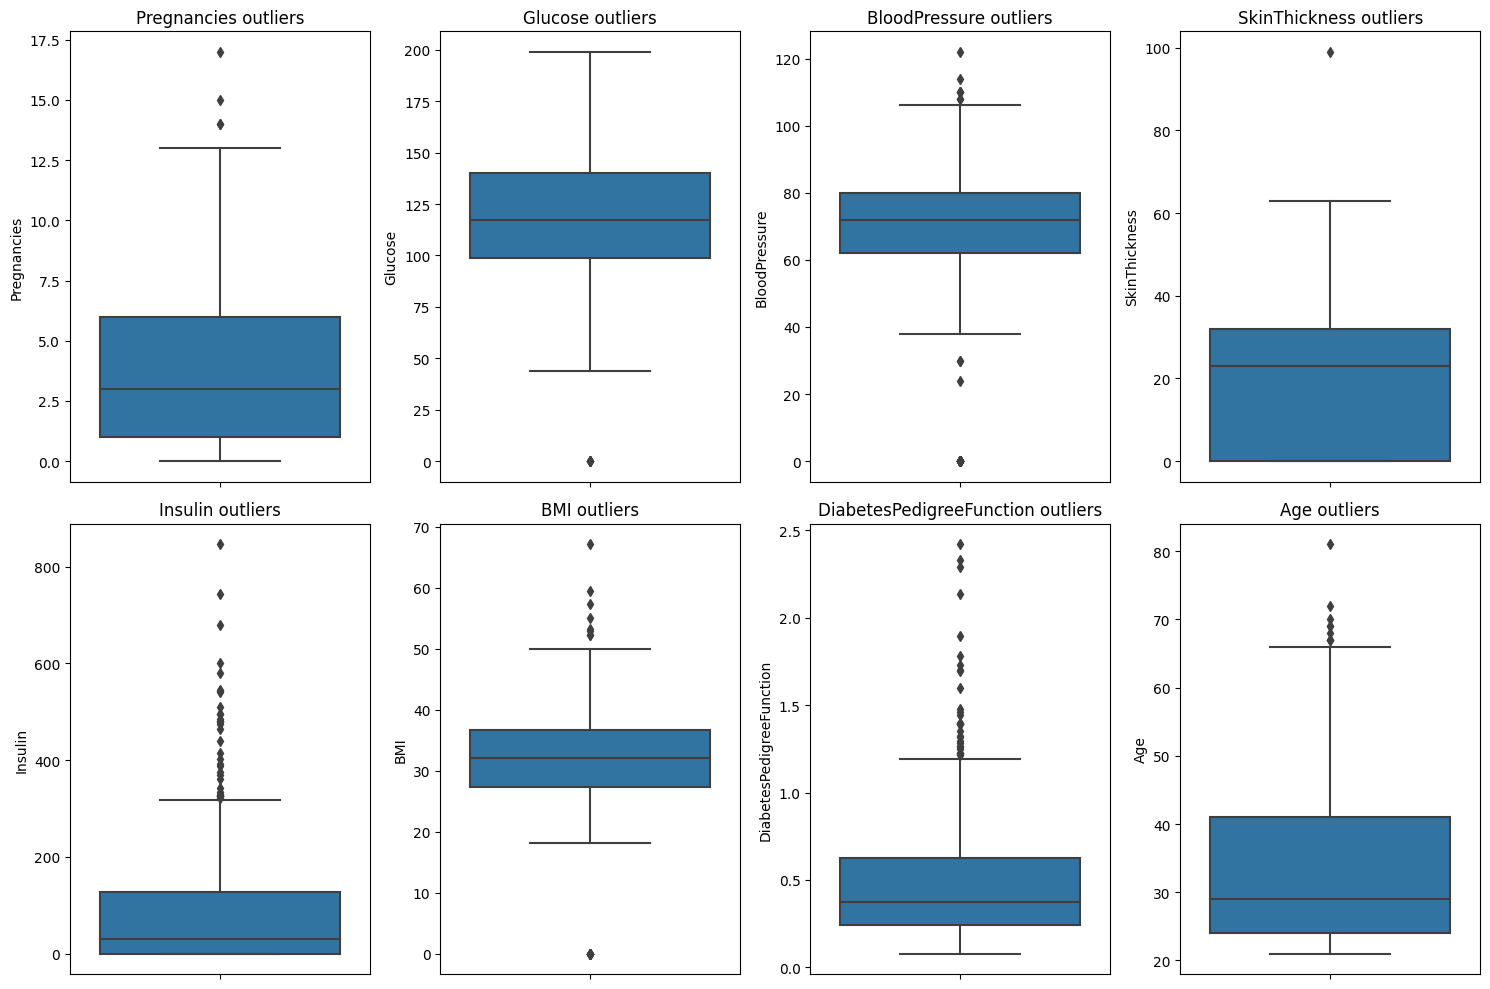

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols=4, figsize=(15, 10))

#removing the 'outcome' column from the dataset and taking the rest of the columns
df_cols = diabetes_data.columns[:-1]
axes = axes.ravel()

#plotting the boxplots to rectify the outliers
for col, ax in zip(df_cols, axes):
  sns.boxplot(data=diabetes_data, y=col, ax=ax)
  ax.set(title=f'{col} outliers', xlabel=None)

fig.tight_layout()
plt.show()

In [ ]:
#detect outliers using IQR
import numpy as np
outliers_up = list()
outliers_down = list()


In [ ]:
def retrive_outliers(column_name, lower_bound_list, upper_bound_list, lower_bound, upper_bound):
  '''
  This function is replacing the ouliers using Interquartile Range Method
  Inputs:
  @column_name = This is the name of the column from which we have to replace the outliers
  @lower_bound_list = This is the list of the lower bounds taken from get_outliers()
  @upper_bound_list = This is the list of the upper bounds taken from get_outliers()
  @lower_bound = This is the of the lower bound value taken from get_outliers()
  @upper_bound = This is the of the upper bound value taken from get_outliers()
  '''
  diabetes_data[column_name].replace(lower_bound_list,lower_bound,inplace=True)
  diabetes_data[column_name].replace(upper_bound_list,upper_bound,inplace=True)

In [ ]:
def get_outliers(data):
    '''
    This function is using the typical outlier finder method to get the outliers from the database.
    Method used: Interquartile Range i.e. IQR
    Input:
      @data = It is a dataframe which has the diabetes related data taken from given CSV.
    Output:
    This function returns 2 lists which consists outliers above the upper bound and Outliers below the lower bound.
    '''
    #get the Q1 and Q3
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #find the Interquartile Range
    IQR = q3-q1

    #Calculate the Lower bound and the Upper Bound
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #finding the Outliers
    for i in data:
        if (i<lwr_bound):
            outliers_down.append(i)
        elif (i>upr_bound):
            outliers_up.append(i)

    return outliers_up, outliers_down, lwr_bound, upr_bound

In [ ]:
#printing outliers with IQR Method
col=diabetes_data[:-1]
for c in col:
    ret_vals = get_outliers(diabetes_data[c])
    print(f"Outliers using Interquartile Range Method: \nColumn_Name:{c} \nOutliers_Upper_Bound:{ret_vals[0]} \nOutliers_Lower_Bound:{ret_vals[1]}")

    #replacing the outliers
    retrive_outliers(c, ret_vals[1], ret_vals[0], ret_vals[2], ret_vals[3])

    #clearing the lists
    outliers_up.clear()
    outliers_down.clear()

Outliers using Interquartile Range Method: 
Column_Name:Pregnancies 
Outliers_Upper_Bound:[15, 17, 14, 14] 
Outliers_Lower_Bound:[]
Outliers using Interquartile Range Method: 
Column_Name:Glucose 
Outliers_Upper_Bound:[] 
Outliers_Lower_Bound:[0, 0, 0, 0, 0]
Outliers using Interquartile Range Method: 
Column_Name:BloodPressure 
Outliers_Upper_Bound:[110, 108, 122, 110, 108, 110, 114] 
Outliers_Lower_Bound:[0, 0, 30, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0]
Outliers using Interquartile Range Method: 
Column_Name:SkinThickness 
Outliers_Upper_Bound:[99] 
Outliers_Lower_Bound:[]
Outliers using Interquartile Range Method: 
Column_Name:Insulin 
Outliers_Upper_Bound:[543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510] 
Outliers_Lower_Bound:[]
Outliers using Interquartile Range Method: 
Column_Name:BMI 
Outliers

###Replacing the Zero Values with Mean values

In [ ]:
cols = diabetes_data[:]
for col in cols:
  diabetes_data[col].replace(0, diabetes_data[col].mean())

###Plotting the data after removal of the outliers

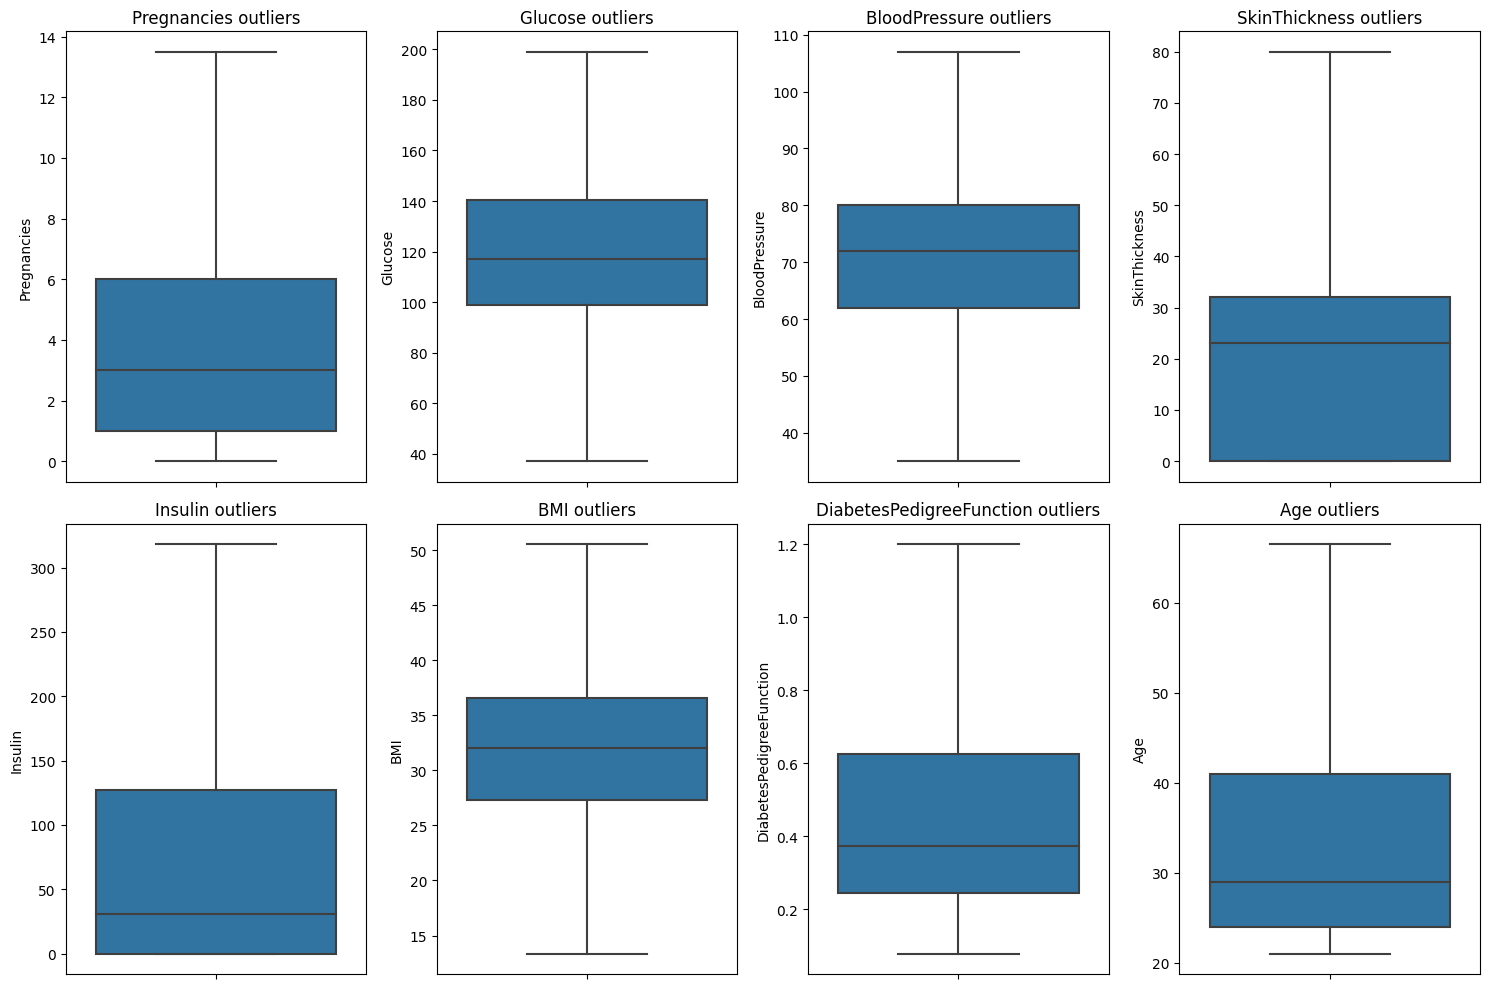

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols=4, figsize=(15, 10))

#removing the 'outcome' column from the dataset and taking the rest of the columns
df_cols = diabetes_data.columns[:-1]
axes = axes.ravel()

#plotting the boxplots to rectify the outliers
for col, ax in zip(df_cols, axes):
  sns.boxplot(data=diabetes_data, y=col, ax=ax)
  ax.set(title=f'{col} outliers', xlabel=None)

fig.tight_layout()
plt.show()

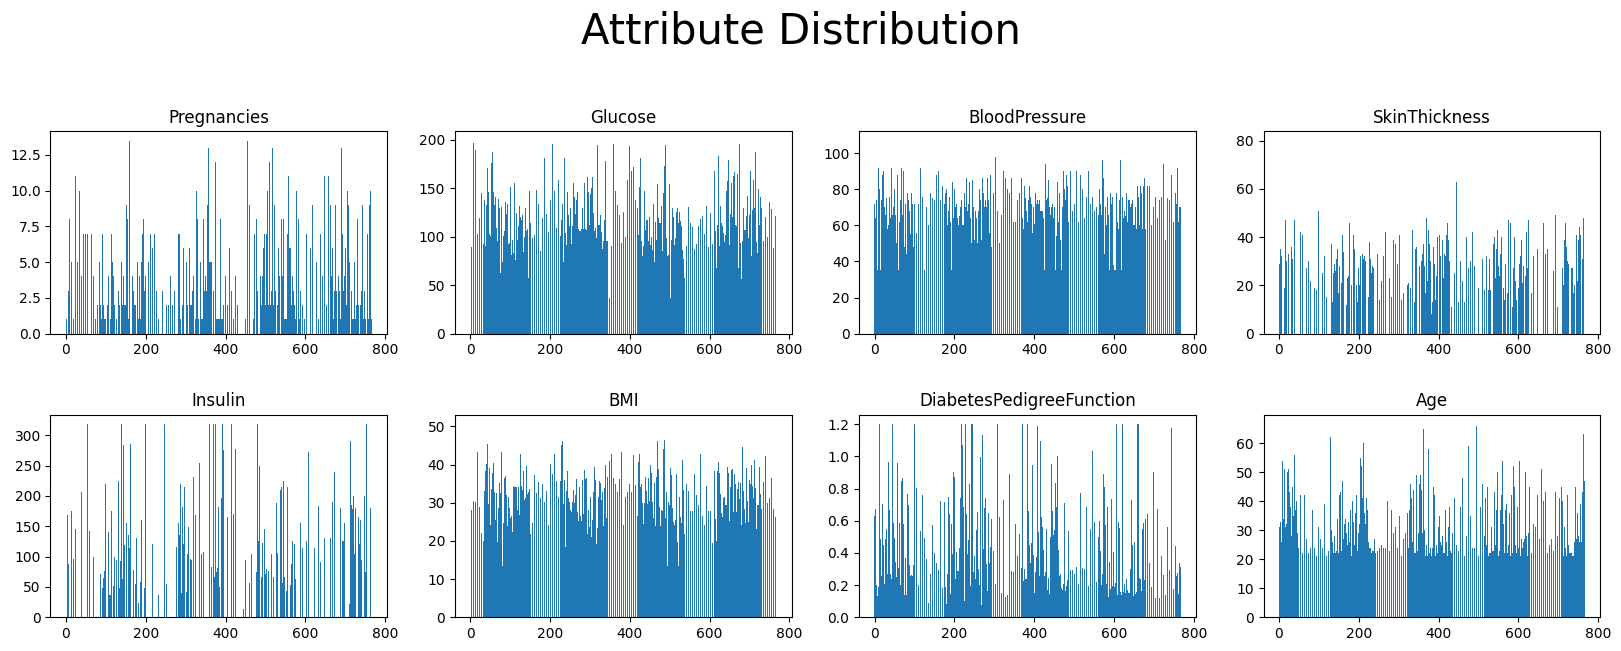

In [ ]:
# Plot each column using bar plot
fig = plt.figure(figsize=(20,10))
title = fig.suptitle("Attribute Distribution", fontsize=30, verticalalignment="center")
for col, num in zip(diabetes_data.describe().columns, range(1,9)):
  axis = fig.add_subplot(3,4, num)
  axis.bar(diabetes_data.index, diabetes_data[col])
  plt.title(col, fontsize=12)

fig.subplots_adjust(hspace=0.4)

###Displaying the Correlation Matrix for the data

In [ ]:
#getting the correlation matrix
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


<Axes: >

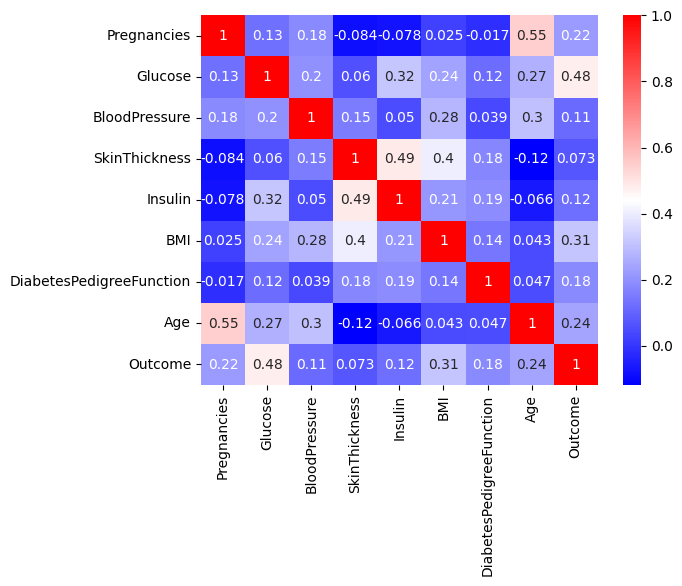

In [ ]:
#Plotting the correlation matrix using seaborn
sns.heatmap(diabetes_data.corr(), cmap='bwr', cbar=True, annot=True)

In [ ]:
diabetes_data.sort_index()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70,27,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72,23,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60,0,0.0,30.1,0.349,47.0,1


###Split the Data into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = diabetes_data.drop('Outcome', axis = 1)
Y = diabetes_data['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

###Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
scaled_X_train = scale.fit_transform(X_train)
scaled_X_test = scale.fit_transform(X_test)

In [ ]:
scaled_X_train.shape, scaled_X_test.shape

((614, 8), (154, 8))

In [ ]:
diabetes_data.groupby('Outcome')['Outcome'].count()

Outcome
0    500
1    268
Name: Outcome, dtype: int64

###Model training


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR_model = LogisticRegression(max_iter=1000)

In [ ]:
LR_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = LR_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import *

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy of Logistic Regression on test data is : {round(accuracy*100)}%')

Accuracy of Logistic Regression on test data is : 75%


In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
confusion_matrix(Y_test, predictions)

array([[80, 19],
       [19, 36]])

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_predictions = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, rfc_predictions)
print(f'Accuracy of Random Forest Classifier on test data is : {round(accuracy*100)}%')

Accuracy of Random Forest Classifier on test data is : 73%


In [ ]:
print(confusion_matrix(Y_test, rfc_predictions))

[[79 20]
 [21 34]]


In [ ]:
print(classification_report(Y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

